In [33]:
%pylab inline
import numpy as np
import seaborn as sns

from scipy.stats import norm, t


Populating the interactive namespace from numpy and matplotlib


# A/B Test Example

바로 예제를 갖고서 설명을 하겠습니다.

| Variation | Conversion | View | Conversion Rate | SE | Confidence Interval |  Change | Confidence | 
|:----------|:-----------|:-----|:----------------|:---|:--------------------|:--------|:-----------|
| Variation A (Control Group) | 330 | 1093 | 30.19% | 0.0138 | $ \pm 2.72 $ % | - | - |
| Variation B (Test Group)    | 385 | 1123 | 34.28% | 0.0141 | $ \pm 2.25 $ % | 44.82% | |

* 95% confidence level을 사용 ( $ \alpha = 0.95 $ )
* 두 그룹간의 차의 z-score는 6.6663

# Conversion Rate 

각각의 variation마다 conversion rate를 다음과 같이 계산 할  수 있습니다.

$$ CR = \frac{\text{event count}}{\text{view count}} $$

위의 A/B Text를 예로 든다면..

$$ \begin{align} 
CR_A &= \frac{330}{1093} = 0.3019213174748399  \\
CR_B &= \frac{377}{1123} = 0.3428317008014248
\end{align} $$



# Standard Error 


## Formula

The standard deviation of the sample mean 을 standard error라고 합니다.<br>

$$ SE = \sqrt{\frac{CR(1-CR)}{n}} $$

* $ CR $ : conversion rate
* $ n $ : sample size (view)

위의 예를 든다면 다음과 같습니다. 

$$ \begin{align} 
SE_{A} &= \sqrt{\frac{0.3019 * (1-0.3019)}{1093}} = 0.013886378416134985 \\
SE_{B} &= \sqrt{\frac{0.3428 * (1-0.3428)}{1123}} = 0.014164097619600914 \\
\end{align} $$


## Explained

베르누이 분포는  $ P(X=1) = p $ 그리고 $ P(X=0) = (1-p) $ 와 같이 오직 두가지 가능한 결과가 일어난다고 했을때 사용되는 분포입니다.<br>

$$ X \sim \mathcal{Bernoulli} (CR) $$

여기서 p는 variation의 conversion rate를 가르킵니다.<br>
이때 mean, variance 그리고 standard deviation 다음과 같습니다. 

$$ \begin{align} 
E[X] &= CR \\
\sigma^2 &= CR(1-CR) \\
\sigma &= \sqrt{CR(1-CR)}
\end{align} $$

Central limit theorem에 따르면 다수의 표본 평균을 계산함으로서 모평균을 추정할 수 있습니다.<br>
즉 표본평균으로 나온 $ CR $ 의 분포는 정규분포를 따르며, 
standard deviation of the population $ \sigma $는 표본평균의 표준오차 (the standard error of the sample mean) 와 동일합니다.<br>
The standard deviation of the sample mean 의 공식은 아래와 같습니다. (베르누이 분포에 대해서..)

$$ \sigma_{\bar{x}} = \frac{s}{\sqrt{n}} = \frac{\sqrt{CR(1-CR)}}{\sqrt{n}} = \sqrt{\frac{CR(1-CR)}{n}} $$

추가적으로 p는 정규분포를 따름으로 다음과 같이 정의할수 있습니다.

$$ \hat{CR} \sim \mathcal{Normal} \left(u=CR, \sigma= \sqrt{\frac{CR(1-CR)}{n}} \right) $$

**아주쉽게 말하면, 표본 평균의 standard error는 표본이 따르는 정규분포의 1 standard deviation이라고 말할 수 있습니다.**




# Confidence Interval 

## Formula


standard error를 알고 있을 경우 confidence interval (신뢰구간)의 공식은 다음과 같습니다.

$$ \begin{align} CI &= CR \pm Z_a * \sigma_{\bar{x}} \\
&= CR \pm Z_a \sqrt{ \frac{CR(1-CR)}{n} } 
\end{align} $$

* CR : Conversion rate
* $ Z_a $ : Z-Score of the standard deviation
* n : sample size

| Confidence Level | Python                    | Python           | $ Z_a $ Value | 
|:-----------------|:--------------------------|:-----------------|:--------|
| 80% 신뢰수준       | norm.ppf(1 - (1-0.8)/2)   | norm.ppf(0.9)    | 1.2815  |
| 85% 신뢰수준       | norm.ppf(1 - (1-0.85)/2)  | norm.ppf(0.075)  | 1.4395  |
| 90% 신뢰수준       | norm.ppf(1 - (1-0.9)/2)   | norm.ppf(0.05)   | 1.6448  |
| 95% 신뢰수준       | norm.ppf(1 - (1-0.95)/2)  | norm.ppf(0.025)  | 1.9599  |
| 99% 신뢰수준       | norm.ppf(1 - (1-0.99)/2)  | norm.ppf(0.005)  | 2.5782  |
| 99.5% 신뢰수준     | norm.ppf(1 - (1-0.995)/2) | norm.ppf(0.0025) | 2.8070  | 
| 99.9% 신뢰수준     | norm.ppf(1 - (1-0.999)/2) | norm.ppf(0.0005) | 3.2905  |


예를 들어서 30.19% conversion rate 그리고 95% 신뢰수준의 confidence interval은 다음과 같이 계산합니다.


$$ CL_A = 0.3019 \pm 1.9599  \sqrt{ \frac{0.3019 ( 1- 0.3019)}{1093} } = 0.02721 $$



## Explained

Population이 $ X_i^{iid} \sim Bernoulli(p) $ 를 따를때 위에서 언급했듯이 mean, variance, standard deviation은 다음과 같습니다.

* mean: $ \mu = E[X] = p $
* variance: $ \sigma^2 = Var(X) = p(1-p) $
* std: $ \sigma = Std(X) = \sqrt{p(1-p)} $
* $ p $ : $ x \in [1, 0] $ 을 따를때 1일 확률. 즉 1을 선택할 확률 <- 우리가 알아내고자 하는 estimator값
* 더 쉽게 이야기 하면 p는 conversion rate이다

Central Limit Theorem에 따르면 the mean of the sample means 그리고 the standard deviation of the sample means는 다음과 같습니다.<br>



$$ \begin{align} \text{the mean of the sample means } &= \mu_{\bar{x}} = \mu = p \\
\text{the standard deviation of the sample means} &= \sigma_{\bar{x}} = \frac{s}{\sqrt{n}} = \sqrt{\frac{p(1-p)}{n}}
\end{align} $$

* 쉽게 말해 표본평균의 평균은 모평균을 따른다
* 표본평균 $ p $ 의 분포는 정규분포를 따른다 (central theorem)
* standard deviation $ \sigma $ 는 standard error of the mean (standard error)과 동일하다

따라서 다음과 같이 정의할 수 있습니다.

$$ \hat{p}   \sim \mathscr{N} \left(\mu=p, \sigma= \sqrt{\frac{p(1-p)}{n}} \right) $$



[A] n:1093 | conversion: 0.3019 | se: 0.01389
[B] n:1123 | conversion: 0.3428 | se: 0.01416


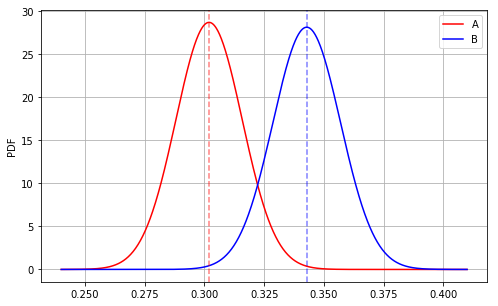

In [130]:
import numpy as np
from scipy.stats import norm

def standard_error(n, p):
    return np.sqrt(p * (1 - p) / n)

n_a = 1093
n_b = 1123
p_a = 330/n_a
p_b = 385/n_b

se_a = standard_error(n_a, p_a)
se_b = standard_error(n_b, p_b)

print(f'[A] n:{n_a} | conversion: {p_a:6.4} | se: {se_a:6.4}')
print(f'[B] n:{n_b} | conversion: {p_b:6.4} | se: {se_b:6.4}')


# Visualization
rv_a = norm(loc=p_a, scale=se_a)
rv_b = norm(loc=p_b, scale=se_b)

x = np.linspace(0.24, 0.41, 1000)

fig, ax = subplots(figsize=(8, 5))
sns.lineplot(x, rv_a.pdf(x), color='red', label='A')
sns.lineplot(x, rv_b.pdf(x), color='blue', label='B')
ax.axvline(x=p_a, c='red', alpha=0.5, linestyle='--')
ax.axvline(x=p_b, c='blue', alpha=0.5, linestyle='--')
plt.ylabel('PDF')
plt.grid()


**Confidence Level**의 공식은 다음과 같습니다.

$$ Z  $$


$$ \begin{align} 
1 - \alpha  &= \text{confidence level}  \\
&= P(-Z_{\alpha/2} \le Z \le Z_{\alpha/2}) \\
&= P(-Z_{\alpha/2} \le 
\end{align} $$ 

* confidence level : 신뢰수준은 일반적으로 percentage로 나타내며, 어떤 통계치가 모수의 신뢰구간에 속할 확률
* $ \alpha $ : 신뢰구간안에 들어오지 않을 확률
* 일반적으로 $ \alpha = 0.05 $ (즉 95% 신뢰수준, 5%의 오차율)를 사용함


> 상황에 따라서 confidence level하나를 구하는데 많은 공식이 있습니다. <br>
> 대부분 population mean, variance등을 아냐 모르냐 등으로 나뉘는데, 현재 문서는 A/B테스트 관점에서..<br>
> $ X \sim Bernoulli(p) $ 를 따른다는 가정하에 샘플의 갯수가 많으며, 모수에 대해서는 모른다는 가정하에서 문서를 작성하였습니다.

## Confidence Coefficient

Confidence interval을 계산하기 전에 먼저 confidence coefficient $ Z_{\alpha/2} $ (**신뢰계수**) 를 계산해야 합니다.<br> 
즉 95% 신뢰도 또는 99% 신뢰도 라는 말을 쓰는데, 이때 사용되는 지수라고 생각하면 됩니다.


$$ \text{confidence coefficient} = Z_{\alpha/2} $$


* $ Z_{\alpha/2} $ :: 임계값. 예를 들어 95% 신뢰도는 0.95이고, 2로 나누면 0.475가 됩니다. <br>표준정규분포에서 47.5%의 확률에 해당하는 z-value는 1.96을 확인 할 수 있습니다. <br>즉 0에서 시작해서 우측으로 47.5% 면적에 해당하는 확률의 z-value가 1.96이라는 뜻입니다.
* 





$ a $ 를 confidence level이라고 하였을때 $ Z_a\ $ Score 는 다음과 같이 계산을 합니다.

$$ Z_a = 1 - \frac{1-a}{2} $$

예를 들어서 95% confidence level은 다음과 같이 계산을 합니다.

$$ Z_{a} = 1 - \frac{1-0.95}{2} $$





**표본의 표준편차를 알고 있는 경우**

$$ CI = \bar{x} \pm Z_a \frac{s}{\sqrt{n}} $$

* $ \bar{x} $ :  표본의 평균
* $ s $ : 표본의 표준편차
* $ n $ : 표본의 갯수 

**평균과 표준오차(Standard Error)만 알고 있는 경우**

$$ CI = \bar{x} \pm Z_a SE $$

* $ \bar{x} $ : 표본의 평균
* $ SE  $ : 표준오차

## Confidence Interval


* Confidence Level: "신뢰수준"으로서 설문조사에서 95% 신뢰수준, 97%신뢰수준등 percentage로 표현됨
* Confidence Interval: "신뢰구간"으로서 표본평균이 모평균과 비교해서 얼마나 오차가 있는지를 나타내며, <br> conversion rate가 30.19%라면 30.19% $ \pm 2.31 $% 처럼 표현이 됨




참고할 내용들

* [Table of z-values for Confidence Intervals](http://www.ltcconline.net/greenl/courses/201/Estimation/smallConfLevelTable.htm)
* [Critical value (z*) for a given confidence level](https://www.khanacademy.org/math/ap-statistics/estimating-confidence-ap/one-sample-z-interval-proportion/v/critical-value-for-a-given-confidence-level)


## Z-Score

population mean (모평균) 그리고 population standard deviation (모표준편차)을 알고 있으며 sample size가 30개 이상인 경우에는 standard score는 다음과 같이 계산합니다.

$$ z = \frac{x - \mu}{\sigma} $$

* $ \mu $ : the mean of the population
* $ \sigma  $ : the standard devistion of the population
* $ z $ : 모평균에서 표준편차로 얼마나 떨어져 있는지를 나타내며, negative라면 평균보다 작고, positive이면 평균보다 크다는 의미


현실적으로 population mean 그리고 population standard deviation을 알고 있는 경우는 특이 많이 없습니다.<br>
이 경우 sample mean 그리고 sample standard deviation을 사용해서 standard score를 계산할 수 있습니다.

$$ z = \frac{x - \bar{x}}{s} $$

$$ s = \frac{\sigma}{\sqrt{n}} $$

* $ \bar{x} $ : the mean of the sample
* $ s $ : the standard deviationn of the sample


Z-Score를 계산했다면, unit normal distribution(mean=0, std=1)에서 해당 Z-Score까지의 면적에 대한 확률을 표준정규분포표를 통해서 확인을 할 수 있습니다.

> [표준정규분포표](https://www.mathsisfun.com/data/standard-normal-distribution-table.html)는 표준정규분포(mean=0, std=1)에서 0에서부터 Z까지의 확률을 나타낸 것입니다. <br>
> ![](images/ab_unit_normal_table.png)

# Change 

Variation A 그리고 variation B가 얼마나 변화 되었는지는 다음의 공식으로 계산 합니다.

$$ Change = \frac{CR_B - CR_A}{CR_A} $$

# Significance Test

그래서 결론적으로 A와 B 둘중에 누가 승자인지 정확하게 알고자 할때 Z-Score를 사용합니다.

$$ Z = \frac{CR_B - CR_A}{\sqrt{ SE^2_A + SE^2_B}} $$

위의 예로 든다면..

$$ Z = \frac{0.4372 - 0.3019}{0.0138^2 + 0.0148^2} = 6.6662 $$






# Calculating P-Value

Z-score값이 양수라고 가정했을때, Pp-value는 standard normal distribution에서 Z-score면접 이후의 부분입니다. 

![](images/ab-p-value.png)


In [2]:
p_value = norm.cdf(6.6662)
print('p-value:', p_value)
print('Statistical Power:', )

p-value: 0.9999999999868744
Statistical Power:


# Null Hypothesis vs Alternate Hypothesis

귀무가설(null hypothesis)는 의미있는 차이가 없는 경위 가설이며, 같은 모집단에서 뽑힌 두개의 집단인 경우 평균, 분산, 분포는 모두 같다고 가정을 합니다. 귀무가설 설정을 통해서 우연히 발생할 사건이 아닌 통계정 유의성을 갖고 있다는 것을 시험해 볼 수 있습니다.

A/B 테스트에서 귀무가설은 두 집단 A 그리고 B는 차이가 없다고 가정을 하며(평균, 분산, 분포), 다음과 같이 정의 할 수 있습니다.

> 참고사항으로 variance의 속성중에 다음이 있습니다. <br>
> $ Var(X + Y) = Var(X) + Var(Y) $ <br>
> $ Var(X - Y) = Var(X) + Var(Y) $


$$ \hat{d} = CR_B - CR_A $$

$$ \begin{align} 
Var(\hat{d}) &= Var(CR_B - CR_A)  \\
&= Var(CR_a) + Var(CR_B)  \\
&= \frac{CR_A ( 1- CR_A)}{n_A} + \frac{CR_B ( 1- CR_B)}{n_B} \\
&= \frac{s^2_A}{n_A} + \frac{s^2_B}{n_B} \\
\end{align} $$

따라서 standard deviation은 다음과 같습니다. 

$$ \begin{align} 
\sigma &= \sqrt{Var(\hat{d})} \\
&= \sqrt{\frac{CR_A ( 1- CR_A)}{n_A} + \frac{CR_B ( 1- CR_B)}{n_B}} \\
&= \sqrt{ SE_A^2 + SE_B^2}
\end{align} $$


> 참고사항으로 Bernoulli distribution의 속성은 다음과 같습니다. <br>
> - $ E[X] = p $ : expected value <br>
> - $ Var[X] = p(1-p) $ : variance <br>
> - $ Std[X] = \sqrt{p(1-p)} $ : standard deviation <br>
> - $ \sigma_{\bar{x}} = \frac{s}{\sqrt{n}} = \frac{\sqrt{p(1-p)}}{\sqrt{n}} $ : the standard deviation of the sample mean


Z score는 다음과 같습니다. 

$$ Z = \frac{CR_B - CR_A}{\sqrt{ SE^2_A + SE^2_B}} $$

즉 Z score는 control group과 test variation 평균값들 사이의 standard deviations의 갯수라고 생각하면 됩니다. 

이후 **P-value**를 계산해야 합니다.<br>
Python에서는 다음과 같이 합니다.

```
p_value = 1 - norm.cdf(z-score)
```


5%의 신뢰수준의 값과 p-value를 비교하여 p_value < 0.05 라면 test variation이 control variation보다 더 좋다는 결론을 얻을 수 있습니다.

In [68]:
def standard_error(n, p):
    return np.sqrt(p * (1-p)/n)

a_n = 1093
b_n = 1123
a_conversion = 330/a_n
b_conversion = 377/b_n

print('A standard error:', standard_error(a_n, a_conversion))
print('B standard error:', standard_error(b_n, b_conversion))

A standard error: 0.013886378416134985
B standard error: 0.014091929261457048


In [ ]:
https://towardsdatascience.com/the-math-behind-a-b-testing-with-example-code-part-1-of-2-7be752e1d06f
http://www.ams.sunysb.edu/~zhu/ams571/Lecture11_571.pdf